In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\olegd\AppData\Local\Temp\ipykernel_6904\193522826.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("bestsellers with categories.csv")


In [3]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
df.shape


(550, 7)

Відповідь: Про скільки книг зберігає дані датасет?550

In [6]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']



Первинне дослідження даних

In [7]:
print("Missing values:\n", df.isnull().sum() / len(df))


Missing values:
 name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


Чи є в якихось змінних пропуски? Відповідь: Ні


In [8]:
print(df['genre'].unique())


['Non Fiction' 'Fiction']


Які є унікальні жанри? Відповідь: Non Fiction та Fiction


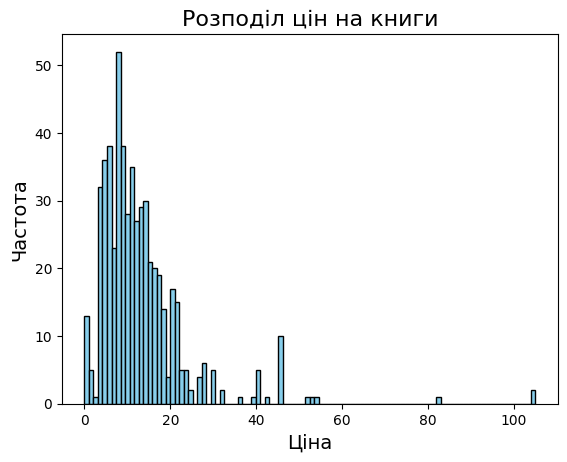

In [9]:
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')

plt.title('Розподіл цін на книги', fontsize=16)
plt.xlabel('Ціна', fontsize=14)
plt.ylabel('Частота', fontsize=14)

plt.show()

In [10]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна? Відповідь: {max_price}")
print(f"Мінімальна ціна? Відповідь: {min_price}")
print(f"Середня ціна? Відповідь: {mean_price}")
print(f"Медіанна ціна? Відповідь: {median_price}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


Пошук та сортування даних


In [11]:
max_rating = df['user_rating'].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

num_books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Скільки книг мають такий рейтинг? Відповідь: {num_books_with_max_rating}")

max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(f"Яка книга має найбільше відгуків? Відповідь: {max_reviews_book}")

top_50_2015_books = df[df['year'] == 2015]
most_expensive_book_2015 = top_50_2015_books[top_50_2015_books['price'] == top_50_2015_books['price'].max()]['name'].values[0]
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {most_expensive_book_2015}")

num_fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {num_fiction_books_2010}")

num_books_with_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {num_books_with_rating_4_9}")

sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_in_sorted_list = sorted_books.tail(1)['name'].values[0]
print(f"Яка книга остання у відсортованому списку? Відповідь: {last_book_in_sorted_list}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


Агрегування даних та з'єднання таблиць


In [12]:
grouped_data = df.groupby('genre')
aggregated_data = grouped_data.agg({'price': ['min', 'max']})

min_price_fiction = aggregated_data.loc['Fiction', ('price', 'min')]
max_price_fiction = aggregated_data.loc['Fiction', ('price', 'max')]
min_price_non_fiction = aggregated_data.loc['Non Fiction', ('price', 'min')]
max_price_non_fiction = aggregated_data.loc['Non Fiction', ('price', 'max')]

print(f"Мінімальна ціна для жанру Fiction: Відповідь: {min_price_fiction}")
print(f"Максимальна ціна для жанру Fiction: Відповідь: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь: {min_price_non_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: Відповідь: {max_price_non_fiction}")

Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Non Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105


In [13]:
author_book_counts = df.groupby('author').agg({'name': 'count'}).reset_index()
author_book_counts.columns = ['author', 'book_count']
number_row = author_book_counts.shape[0]
number_col = author_book_counts.shape[1]
author_max_books = author_book_counts[author_book_counts['book_count'] == author_book_counts['book_count'].max()]['author'].values[0]
max_books = author_book_counts['book_count'].max()
print(f"Якої розмірності вийшла таблиця? Відповідь: {number_row} рядків, {number_col} стовпці")
print(f"Який автор має найбільше книг? Відповідь: {author_max_books}")
print(f"Скільки книг цього автора? Відповідь: {max_books}")

Якої розмірності вийшла таблиця? Відповідь: 248 рядків, 2 стовпці
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [14]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_avg_rating.columns = ['author', 'avg_rating']

author_min_rating = author_avg_rating[author_avg_rating['avg_rating'] == author_avg_rating['avg_rating'].min()]['author'].values[0]
min_rating = author_avg_rating['avg_rating'].min()

print(f"У якого автора середній рейтинг мінімальний? Відповідь: {author_min_rating}")
print(f"Який у цього автора середній рейтинг? Відповідь: {min_rating}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


In [15]:
merged_data = pd.concat([author_book_counts, author_avg_rating], axis=1)

sorted_data = merged_data.sort_values(by=['book_count', 'avg_rating'])
first_author = sorted_data.iloc[0]['author']

print(f"Який автор перший у списку? Відповідь: {first_author[0]}")

Який автор перший у списку? Відповідь: Muriel Barbery


C:\Users\olegd\AppData\Local\Temp\ipykernel_6904\2527926618.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Який автор перший у списку? Відповідь: {first_author[0]}")


Діаграма середнього рейтингу за жанрами


C:\Users\olegd\AppData\Local\Temp\ipykernel_6904\1770102248.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='user_rating', data=df, errorbar=None, palette='viridis')


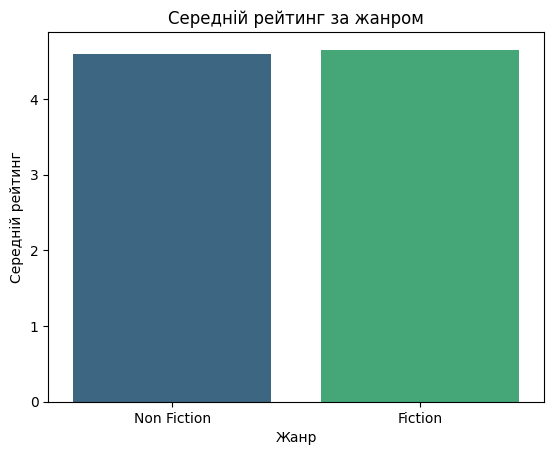

In [16]:
sns.barplot(x='genre', y='user_rating', data=df, errorbar=None, palette='viridis')
plt.title('Середній рейтинг за жанром')
plt.xlabel('Жанр')
plt.ylabel('Середній рейтинг')
plt.show()

Гістограма розподілу рейтингів


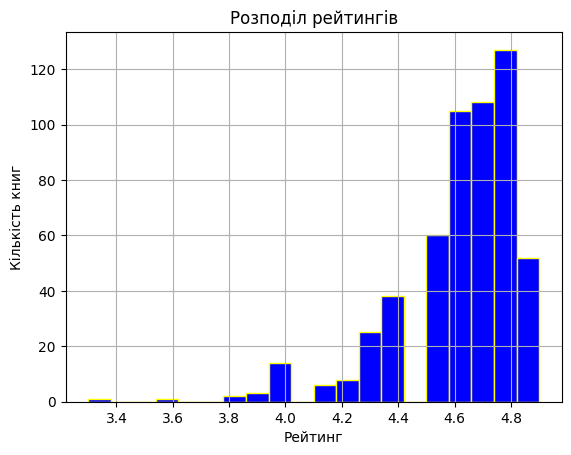

In [17]:
df['user_rating'].hist(bins=20, color='blue', edgecolor='yellow')
plt.title('Розподіл рейтингів')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()